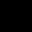

In [1]:
import numpy as np
from PIL import Image

data = np.zeros([32, 32, 3], dtype=np.uint8)
image = Image.fromarray(data,'RGB')
image

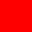

In [2]:
data[:,:] = [255,0,0]
image = Image.fromarray(data,'RGB')
image

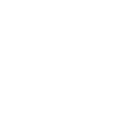

In [3]:
data = np.zeros([128,128,3],dtype=np.uint8)
data[:,:] = [255,255,255]
image = Image.fromarray(data,'RGB')
image

In [4]:
import os
image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/pillow_practice.png'
img = Image.open(image_path)
img

print(img.width)
print(img.height)

new_image_path = os.getenv('HOME') + '/aiffel/python_image_proc/data/pillow_practice.jpg'
img = img.convert('RGB')
img.save(new_image_path)

620
465


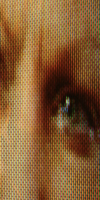

In [5]:
resized_image = img.resize((100,200))

resized_image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/pillow_practice_resized.png'
resized_image.save(resized_image_path)
resized_image


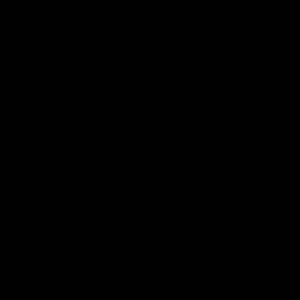

In [6]:
cropped = resized_image.crop((300,100,600,400))

cropped_image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/pillow_practice_cropped.png'
cropped.save(cropped_image_path)
cropped

In [7]:
import os
import pickle
from PIL import Image

In [8]:
dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')

print(type(train))
#print(train)   # 혹시 내용이 궁금하다면 주석을 풀고 실행해 보세요.

<class 'dict'>


In [9]:
train.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [10]:
type(train[b'filenames'])

list

In [11]:
train[b'filenames'][0:5]

[b'bos_taurus_s_000507.png',
 b'stegosaurus_s_000125.png',
 b'mcintosh_s_000643.png',
 b'altar_boy_s_001435.png',
 b'cichlid_s_000031.png']

In [12]:
train[b'data'][0:5]

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       [124, 131, 135, ..., 232, 236, 231],
       [ 43,  32,  87, ...,  60,  29,  37]], dtype=uint8)

In [13]:
train[b'data'][0].shape

(3072,)

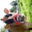

In [14]:
image_data = train[b'data'][0].reshape([32,32,3],order='F')
image = Image.fromarray(image_data)
image

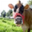

In [15]:
image_data = image_data.swapaxes(0, 1)
image = Image.fromarray(image_data)
image

In [35]:
import os
import pickle
from PIL import Image
import numpy
from tqdm import tqdm

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다. 
images_dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-images'
if not os.path.exists(images_dir_path):
    os.mkdir(images_dir_path)  # images 디렉토리 생성

# 32X32의 이미지 파일 50000개를 생성합니다. 
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    for i in tqdm(range(len(train[b'filenames']))):
        # [[YOUR CODE]]
        filename = train[b'filenames'][i].decode()
        data = train[b'data'][i].reshape([32,32,3],order='F')
        image = Image.fromarray(data.swapaxes(0, 1))
        image.save(os.path.join(images_dir_path,filename))

100%|██████████| 50000/50000 [00:24<00:00, 2042.29it/s]


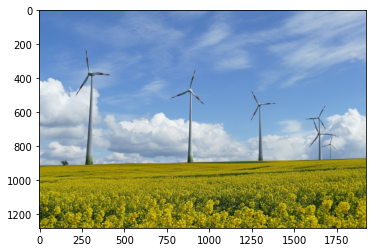

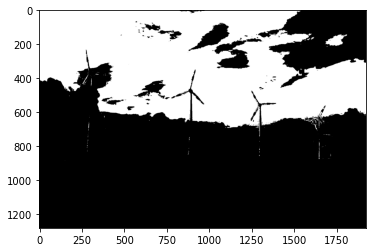

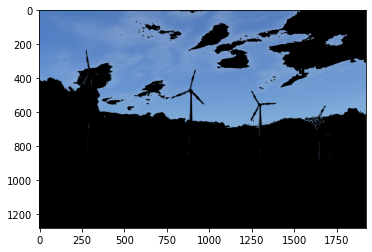

In [36]:
import os
import cv2 as cv
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

img_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cv_practice.png'
img = cv.imread(img_path)

# Convert BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([100,100,100])
upper_blue = np.array([130,255,255])
# np.array(hue, satuaration, value )

# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, lower_blue, upper_blue)
#  return array that consist with if the pixel is in range put 1 else put 0
# mask.shape() = (width,hight,1(because it's either 1 or 0 ))

# Bitwise-AND mask and original image
res = cv.bitwise_and(img, img, mask=mask)
# bitwise function is ment to add two images literally bitwise, but in this cas we don't need that, so we put same image
# the important thing is that we used mask so that we can extract only the part we want to show 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()
# or you can use cv.open(res)/PIL.Image.show() for same action

In [37]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from PIL import Image

# 전처리 시 생성했던 디렉토리 구조
dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/'
train_file_path = os.path.join(dir_path, 'train')
images_dir_path = os.path.join(dir_path, 'cifar-images')

In [38]:
del img

In [39]:
# 파일명을 인자로 받아 해당 이미지 파일과 히스토그램을 출력해 주는 함수
def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(images_dir_path, file_name)
    print(image_path)
    # 이미지 열기
    img = Image.open(image_path)
    cv_image = cv2.imread(image_path)

    # Image와 Histogram 그려보기
    f=plt.figure(figsize=(10,3))
    im1 = f.add_subplot(1,2,1)
    im1.imshow(img)
    im1.set_title("Image")

    im2 = f.add_subplot(1,2,2)
    color = ('b','g','r')
    for i,col in enumerate(color):
        # image에서 i번째 채널의 히스토그램을 뽑아서(0:blue, 1:green, 2:red)
        histr = cv2.calcHist([cv_image],[i],None,[256],[0,256])   
        im2.plot(histr,color = col)   # 그래프를 그릴 때 채널 색상과 맞춰서 그립니다.
    im2.set_title("Histogram")

/aiffel/aiffel/python_image_proc/cifar-images/adriatic_s_001807.png


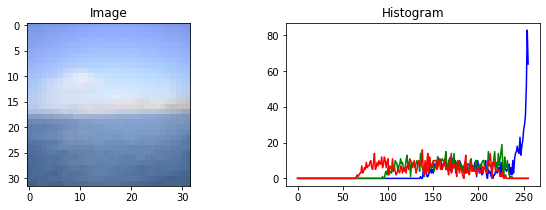

In [40]:
draw_color_histogram_from_image('adriatic_s_001807.png')

In [41]:
def get_histogram(image):
    histogram = []

    # Create histograms per channels, in 4 bins each.
    for i in range(3):
        channel_histogram = cv2.calcHist(images=[image],
                                         channels=[i],
                                         mask=None,
                                         histSize=[4],  # 히스토그램 구간을 4개로 한다.
                                         ranges=[0, 256])
        histogram.append(channel_histogram)  

    histogram = np.concatenate(histogram)
    histogram = cv2.normalize(histogram, histogram)

    return histogram

In [42]:
filename = train[b'filenames'][0].decode()
file_path = os.path.join(images_dir_path,filename)
image = cv2.imread(file_path)
hitogram = get_histogram(image)
hitogram

array([[0.3126804 ],
       [0.4080744 ],
       [0.14521089],
       [0.21940625],
       [0.18654831],
       [0.23742512],
       [0.30208108],
       [0.35931748],
       [0.06465594],
       [0.35825753],
       [0.36991683],
       [0.29254165]], dtype=float32)

In [43]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt


def build_histogram_db():
    histogram_db = {}

    #디렉토리에 모아 둔 이미지 파일들을 전부 리스트업합니다. 
    path = images_dir_path
    file_list = os.listdir(images_dir_path)

    for file_name in tqdm(file_list):
        file_path = os.path.join(images_dir_path, file_name)
        image = cv2.imread(file_path)

        histogram = get_histogram(image)

        histogram_db[file_name] = histogram

    return histogram_db


In [44]:
histogram_db = build_histogram_db()
histogram_db['adriatic_s_001807.png']

100%|██████████| 49999/49999 [00:05<00:00, 9545.53it/s]


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

In [45]:
def get_target_histogram():
    filename = input("이미지 파일명을 입력하세요: ")
    if filename not in histogram_db:
        print('유효하지 않은 이미지 파일명입니다.')
        return None
    return histogram_db[filename]

In [46]:
target_histogram = get_target_histogram()
target_histogram

이미지 파일명을 입력하세요: adriatic_s_001807.png


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

In [47]:
def search(histogram_db, target_histogram, top_k=5):
    results = {}
    
    for file_name , histogram in tqdm(histogram_db.items()):
        distance = cv2.compareHist(H1=target_histogram,
                                 H2=histogram,
                                 method=cv2.HISTCMP_CHISQR)
        
        results[file_name]=distance
        
    results=dict(sorted(results.items(),key=lambda item:item[1])[:top_k])
    
    return results

In [48]:
result = search(histogram_db, target_histogram)
result

100%|██████████| 49999/49999 [00:00<00:00, 681703.24it/s]


{'adriatic_s_001807.png': 0.0,
 'baby_s_001654.png': 0.047506706444185816,
 'fogbank_s_000423.png': 0.059270738493642845,
 'tank_s_000442.png': 0.060966690827361725,
 'dessert_plate_s_000124.png': 0.06113711905561663}

In [49]:
def show_result(result):
    f=plt.figure(figsize=(10,3))
    for idx, filename in enumerate(result.keys()):    
        img_path = os.path.join(images_dir_path, filename)
        im = f.add_subplot(1,len(result),idx+1)
        img = Image.open(img_path)
        im.imshow(img)


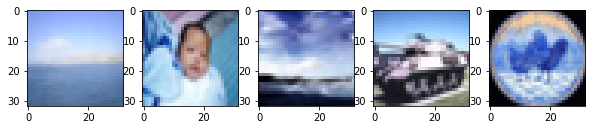

In [50]:
show_result(result)

이미지 파일명을 입력하세요: adriatic_s_001807.png


100%|██████████| 49999/49999 [00:00<00:00, 731426.70it/s]


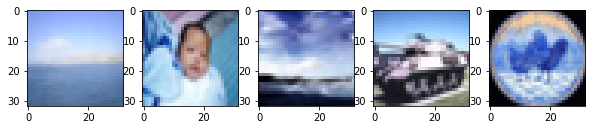

In [51]:
target_histogram = get_target_histogram()
result = search(histogram_db, target_histogram)
show_result(result)